# Code von Belana

8070 8070


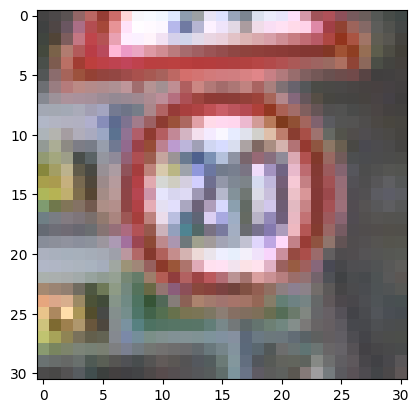

<class 'list'> <class 'list'>


In [ ]:

import numpy as np
import matplotlib as plt
#import seaborn as sns
#import scikit-learn as sk   #only for visualization and pre-processing 

#load data 

#does this work? just copied from google?!

import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import glob
from readTrafficSigns1 import readTrafficSigns
#trainImages, trainLabels = readTrafficSigns(r"C:\Users\belan\Documents\Uni\4. Semester\Foundations of ML\Final Assignment Data\GTSRB_Final_Training_Images\GTSRB\Final_Training\Images")
trainImages, trainLabels = readTrafficSigns(r"C:\Users\belan\Documents\Uni\4. Semester\Foundations of ML\Final Assignment Data\GTSRB\Final_Training\Images")
testImages, testLabels = readTrafficSigns(r"C:\Users\belan\Documents\Uni\4. Semester\Foundations of ML\Final Assignment Data\GTSRB\Final_Test\Images")
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[3])
plt.show()
print(type(trainLabels),type(trainImages))

In [ ]:
trainLabels_array = np.array(trainLabels,dtype=int, ndmin=2) # debug onehot
print(trainLabels_array, trainLabels_array.shape)
#one hot encoding of labels


[[0 0 0 ... 4 4 4]] (1, 8070)


In [25]:
type(num_classes)

numpy.float32

In [38]:
print(trainLabels_array.dtype)

<U1


In [41]:
#one hot encoding of labels
num_classes = trainLabels_array.max() + 1  
trainLabels_one_hot= np.zeros((trainLabels_array.size, num_classes))
trainLabels_one_hot[np.arange(trainLabels_array.size), trainLabels_array] = 1
print(trainLabels_one_hot.shape, trainLabels_one_hot, type(trainLabels_one_hot))

(8070, 5) [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] <class 'numpy.ndarray'>


(31, 31, 3)
171 171


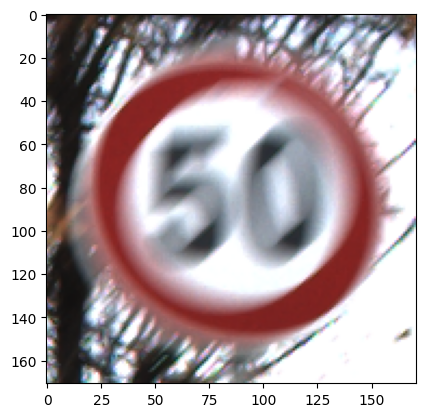

In [12]:
print(trainImages[3].shape)
max_pixel_x = 0
max_pixel_y = 0


for i in range(len(trainImages)):
    pixel_x = trainImages[i].shape[0]
    pixel_y = trainImages[i].shape[1]

    if pixel_x > max_pixel_x:
        max_pixel_x = pixel_x
        index = i 
    if pixel_y > max_pixel_y:
        max_pixel_y = pixel_y

print(max_pixel_x, max_pixel_y)
plt.imshow(trainImages[index])


(171, 171, 3)


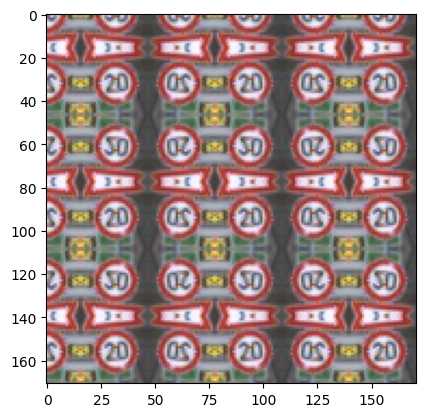

In [13]:
#makes all images the same pixel size
resized_images = []

#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y
    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,border_x,0, border_y,0,cv2.BORDER_REFLECT) 
    #save new image with borders
    resized_images.append(img)

plt.imshow(resized_images[5])
print(resized_images[3].shape)



Dimensions of the normlized image:(171, 171) Example of normalized values:[[0.7254902  0.42352941 0.61568627 ... 0.36470588 0.36862745 0.36470588]
 [0.59607843 0.45098039 0.83529412 ... 0.34117647 0.37254902 0.3372549 ]
 [0.47843137 0.47058824 0.61568627 ... 0.31764706 0.33333333 0.3254902 ]
 ...
 [0.50588235 0.45490196 0.40392157 ... 0.27843137 0.28627451 0.29019608]
 [0.45882353 0.35294118 0.34117647 ... 0.25490196 0.28627451 0.34117647]
 [0.41176471 0.35686275 0.34117647 ... 0.27058824 0.28627451 0.34901961]]


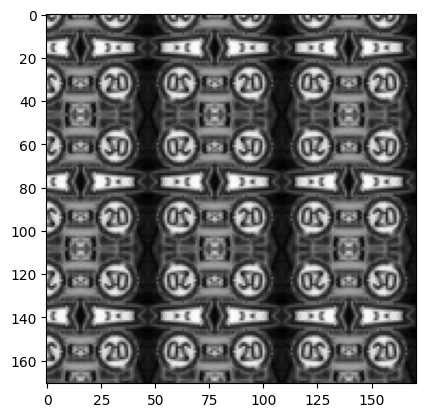

In [14]:
#conversion to grey scale and normalization
normalized_images = []
grey_scale_images = []
for i in range(len(resized_images)):
    #conversion to greyscale reduces dimensiomns from 3 to 2
    grey_scale_images.append(cv2.cvtColor(resized_images[i], cv2.COLOR_RGB2GRAY))  # Convert to grayscale
    normalized_images.append(grey_scale_images[i] / 255.0)  # Normalize pixel values to [0, 1]
#plot gray scale image and show normalized values of image
plt.imshow(grey_scale_images[5], cmap='gray')
print(f"Dimensions of the normlized image:{normalized_images[3].shape}",f"Example of normalized values:{normalized_images[3]}")


In [ ]:
for i in range(10):
    plt.imshow(grey_scale_images[5], cmap='gray')
    plt.show()

In [ ]:
#build feed-forward network (based on log-regression neurons)

In [ ]:
#demonstrate training, evaluation and interpretation of the model

In [ ]:
#validation set: choose hyper parameters 

In [ ]:
#use code for evaluation metric from other code?
#accuracy plots, comparisions

# Code von Jeremy

8070 8070


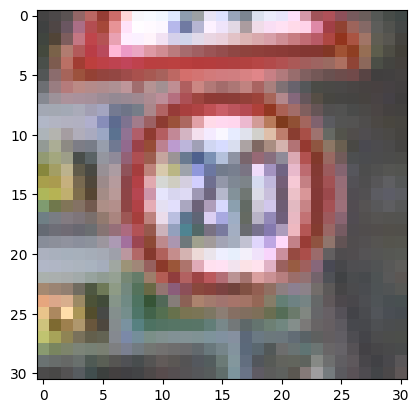

<class 'list'> <class 'list'>


In [18]:
import matplotlib.pyplot as plt

#from utils.readTrafficSigns import readTrafficSigns #für meine lokale Konfiguration
from readTrafficSigns1 import readTrafficSigns

trainImages, trainLabels = readTrafficSigns(r"C:\Users\PC\Foundations of Machine Learning\FinalTesting\data\GTSRB\Final_Training\Images") # hier muss jeder immer seinen Lokalen Pfad angeben, das ggf mit syspath oder so cleaner machen
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[3])
plt.show()
print(type(trainLabels),type(trainImages))

(31, 31, 3)
171 171


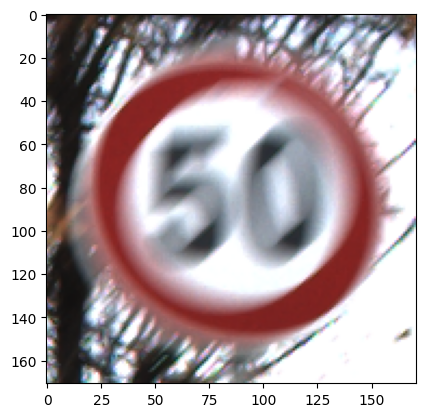

In [19]:
#find max_pixel values
print(trainImages[3].shape)
max_pixel_x = 0
max_pixel_y = 0


for i in range(len(trainImages)):
    pixel_x = trainImages[i].shape[0]
    pixel_y = trainImages[i].shape[1]

    if pixel_x > max_pixel_x:
        max_pixel_x = pixel_x
        index = i 
    if pixel_y > max_pixel_y:
        max_pixel_y = pixel_y

print(max_pixel_x, max_pixel_y)
plt.imshow(trainImages[index])

(171, 171, 3)


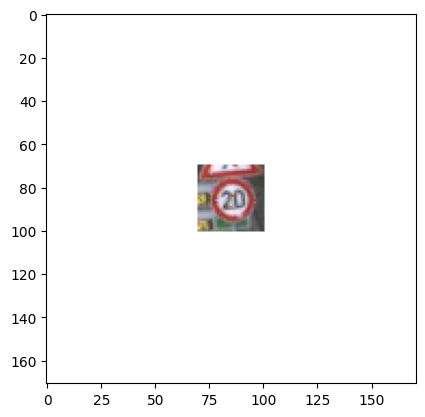

In [20]:
import cv2 
#makes all images the same pixel size
resized_images = []


#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y

    # alligns padding so that picture is displayed in the middle
    top = border_x // 2
    bottom = border_x - top
    left = border_y // 2
    right = border_y - left

    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,top,bottom, left,right,cv2.BORDER_CONSTANT, value=[255, 255, 255]) 
    #save new image with borders
    resized_images.append(img)

plt.imshow(resized_images[5])
print(resized_images[7].shape)

Ideen für die Network-Klassen:

In [ ]:
"das sollte eig funktionieren, aber mein PC macht nen Memory Error weil das array apparently 8 GB groß wird"

# Convert to numpy array with float32 type
# prepare input for Network (flatten it)
X = np.array([img.flatten() for img in normalized_images], dtype=np.float32)

# normalize it again, do we have to do this?
#X /= 255.0


In [59]:
#build feed-forward network (based on log-regression neurons)

"""Multi layer Perceptron to be used for image classification

Input: (greyscaled) image as flattened array

Output: vector of class probabilities (given by softmax?)

"""
import numpy as np


class MLP:
    def __init__(self, input_length, length_hidden_layer, length_output_layer):
        
        # layers = weight matrixes with dimensions: previous layer x next layer
        self.weights_input_hidden = np.random.randn(input_length, length_hidden_layer)
        self.weights_hidden_output = np.random.randn(length_hidden_layer, length_output_layer) 

        # biases to add
        self.bias_hidden = np.zeros((1,length_hidden_layer))
        self.bias_output = np.zeros((1,length_output_layer))
        

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def ReLu(self, x): # input is matrix
        return x * (x > 0) # matrix mult. between x and 0|1 / True|False matrix -> 0 if > 0, else just the number
    """def relu1(a):
    return np.maximum(0, a"""


    def forward_pass(self, X):
        
        # hidden layer calculations
        self.input_hidden_layer = np.matmul(X, self.weights_input_hidden) + self.bias_hidden
        self.output_hidden_layer = self.ReLu(self.input_hidden_layer)

        # output layer calculations
        self.output_layer = np.dot(self.output_hidden_layer, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.output_layer)
       
        
        return self.final_output
    
    # y = taget Labels

    def backward_pass(self, X, y, output, learning_rate):

        m = X.shape[0]

        output_error = output - y  # Shape: (N, C)
        relu_derivative = (self.input_hidden_layer > 0).astype(float)  # Shape: (N, H)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative  # Shape: (N, H)
    
        # Gradients
      
        dW_hidden_output = np.dot(self.output_hidden_layer.T, output_error) / m # DebugLoss: Gradienten normalisieren (teilen durch Batchgröße) 
        db_output = np.sum(output_error, axis=0, keepdims=True) / m
        dW_input_hidden = np.dot(X.T, hidden_error) / m
        db_hidden = np.sum(hidden_error, axis=0, keepdims=True) / m
        
        
        # Update weights and biases
        self.weights_hidden_output -= learning_rate * dW_hidden_output
        self.bias_output -= learning_rate * db_output

        self.weights_input_hidden -= learning_rate * dW_input_hidden
        self.bias_hidden -= learning_rate * db_hidden
    

    def train(self, X, y, epochs, learning_rate):

        for epoch in range(epochs):
            output = self.forward_pass(X)

            self.backward_pass(X, y, output, learning_rate)

            #if (epoch + 1) % 10 == 0 or epoch == 0:
            loss = -np.sum(y * np.log(output + 1e-15)) /(len(y))
            print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')



    def predict(self, X):
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)



In [ ]:
# testing

network = MLP(len(X[1]),10, len(trainLabels_one_hot[0])) 

train = network.train(X, trainLabels_one_hot, 50, 0.05)


Epoch 1, Loss: 2.3907
Epoch 2, Loss: 2.2106
Epoch 3, Loss: 2.0877
Epoch 4, Loss: 2.0020
Epoch 5, Loss: 1.9394
Epoch 6, Loss: 1.8918
Epoch 7, Loss: 1.8541
Epoch 8, Loss: 1.8232
Epoch 9, Loss: 1.7972
Epoch 10, Loss: 1.7750
Epoch 11, Loss: 1.7557
Epoch 12, Loss: 1.7386
Epoch 13, Loss: 1.7234
Epoch 14, Loss: 1.7097
Epoch 15, Loss: 1.6972
Epoch 16, Loss: 1.6860
Epoch 17, Loss: 1.6756
Epoch 18, Loss: 1.6661
Epoch 19, Loss: 1.6574
Epoch 20, Loss: 1.6493
Epoch 21, Loss: 1.6418
Epoch 22, Loss: 1.6349
Epoch 23, Loss: 1.6284
Epoch 24, Loss: 1.6223
Epoch 25, Loss: 1.6167
Epoch 26, Loss: 1.6114
Epoch 27, Loss: 1.6065
Epoch 28, Loss: 1.6018
Epoch 29, Loss: 1.5973
Epoch 30, Loss: 1.5931
Epoch 31, Loss: 1.5892
Epoch 32, Loss: 1.5854
Epoch 33, Loss: 1.5819
Epoch 34, Loss: 1.5785
Epoch 35, Loss: 1.5753
Epoch 36, Loss: 1.5723
Epoch 37, Loss: 1.5694
Epoch 38, Loss: 1.5666
Epoch 39, Loss: 1.5639
Epoch 40, Loss: 1.5614
Epoch 41, Loss: 1.5589
Epoch 42, Loss: 1.5566
Epoch 43, Loss: 1.5543
Epoch 44, Loss: 1.55

In [ ]:
#VORLAGE für ein MLP
#build feed-forward network (based on log-regression neurons)

import numpy as np


"""Multi layer Perceptron to be used for image classification

Input: (greyscaled) image as array

Output: vector of class probabilities (given by softmax?)

"""

class MLP:
   
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.final_input)
        return self.final_output

    def backward(self, X, y, output, learning_rate):
    
        output_error = output - y
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.hidden_output * (1 - self.hidden_output)
        
        self.weights_hidden_output -= learning_rate * np.dot(self.hidden_output.T, output_error)
        self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
        self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
        self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            if (epoch+1) % 100 == 0:
                loss = -np.sum(y * np.log(output)) / X.shape[0]
                print(f'Epoch {epoch+1}, Loss: {loss:.4f}')

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


In [ ]:
# build CNN

class CNN:
    def init():
        pass

    def convolutional_layer():
        pass

    def pooling_layer():
        pass

    def forward_pass():
        pass

    def backward_pass():
        pass